In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# BERT

In [2]:
data = pd.read_csv(os.path.abspath("../new-EventsAdapt.bert-large-cased.sentence-PLL.txt"), sep="\t", header=None)
data.head()

,0,1,2,3,4
0,0,The raider caught the illness.,-30.241989,7,5
1,1,The illness caught the raider.,-32.615458,7,5
2,2,The illness was caught by the raider.,-29.980001,9,7
3,3,The raider was caught by the illness.,-35.720892,9,7
4,4,The marauder contracted the disease.,-37.814443,9,5


In [3]:
data.columns = ["sentence_id", "sentence", "PLL", "num_tokens", "num_words"]
data["negative PLL"] = -1 * data["PLL"]
data["Plausibility"] = ["Plausibile" if ind%2 == 0 else "Implausible" for ind in range(len(data))]
data["Voice"] = ["active" if ind % 4 in [0,1] else "passive" for ind in range(len(data))]
data

,sentence_id,sentence,PLL,num_tokens,num_words,negative PLL,Plausibility,Voice
0,0,The raider caught the illness.,-30.241989,7,5,30.241989,Plausibile,active
1,1,The illness caught the raider.,-32.615458,7,5,32.615458,Implausible,active
2,2,The illness was caught by the raider.,-29.980001,9,7,29.980001,Plausibile,passive
3,3,The raider was caught by the illness.,-35.720892,9,7,35.720892,Implausible,passive
4,4,The marauder contracted the disease.,-37.814443,9,5,37.814443,Plausibile,active
...,...,...,...,...,...,...,...,...
1643,1643,The plumber was devastated by the foreman.,-43.959518,10,7,43.959518,Implausible,passive
1644,1644,The sergeant identified the sniper.,-16.677115,6,5,16.677115,Plausibile,active
1645,1645,The sniper identified the sergeant.,-22.240836,6,5,22.240836,Implausible,active
1646,1646,The sniper was identified by the sergeant.,-15.529963,8,7,15.529963,Plausibile,passive


In [4]:
data

,sentence_id,sentence,PLL,num_tokens,num_words,negative PLL,Plausibility,Voice
0,0,The raider caught the illness.,-30.241989,7,5,30.241989,Plausibile,active
1,1,The illness caught the raider.,-32.615458,7,5,32.615458,Implausible,active
2,2,The illness was caught by the raider.,-29.980001,9,7,29.980001,Plausibile,passive
3,3,The raider was caught by the illness.,-35.720892,9,7,35.720892,Implausible,passive
4,4,The marauder contracted the disease.,-37.814443,9,5,37.814443,Plausibile,active
...,...,...,...,...,...,...,...,...
1643,1643,The plumber was devastated by the foreman.,-43.959518,10,7,43.959518,Implausible,passive
1644,1644,The sergeant identified the sniper.,-16.677115,6,5,16.677115,Plausibile,active
1645,1645,The sniper identified the sergeant.,-22.240836,6,5,22.240836,Implausible,active
1646,1646,The sniper was identified by the sergeant.,-15.529963,8,7,15.529963,Plausibile,passive


In [5]:
#define global figure settings
import matplotlib
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

custom_params = {"axes.spines.right": False,
                 "axes.spines.top": False,
                 'ytick.left': True,
                 'xtick.bottom': True,
                'grid.linestyle': "" #gets rid of horizontal lines
                }
sns.set_theme(font_scale=1, style="white", rc=custom_params)

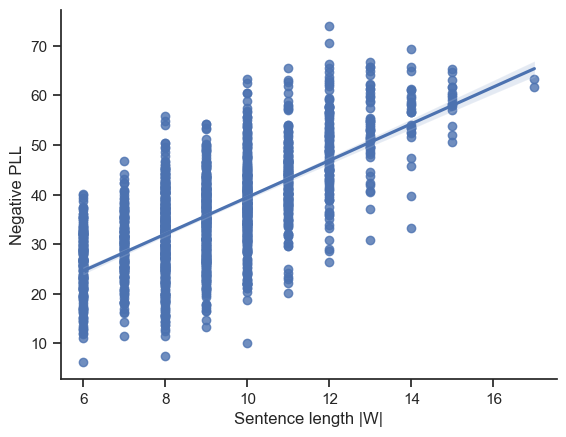

In [6]:
sns.regplot(data=data, x = "num_tokens", y = "negative PLL")
plt.xlabel('Sentence length |W|')
plt.ylabel('Negative PLL')
plt.savefig(f'NewPLL_scoreVsLength.svg', dpi=180)
plt.savefig(f'NewPLL_scoreVsLength.png', dpi=180, bbox_inches='tight')
plt.show()

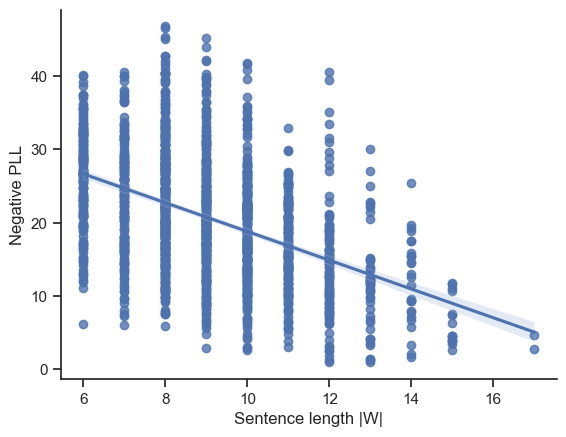

In [7]:
# old PLL
data_old = pd.read_csv(os.path.abspath("../old/new-EventsAdapt.bert-large-cased.sentence-PLL.txt"), sep="\t", header=None)
data_old.columns = ["sentence_id", "sentence", "PLL"]
data_old["num_tokens"] = data["num_tokens"]
data_old["negative PLL"] = -1 * data_old["PLL"]
sns.regplot(data=data_old, x = "num_tokens", y = "negative PLL")
plt.xlabel('Sentence length |W|')
plt.ylabel('Negative PLL')
plt.savefig(f'OldPLL_scoreVsLength.svg', dpi=180)
plt.savefig(f'OldPLL_scoreVsLength.png', dpi=180, bbox_inches='tight')
plt.show()

In [8]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
g = sns.FacetGrid(data, col="Plausibility", row="Voice", sharex=False, sharey=False)
g.map(sns.regplot, "num_tokens", "negative PLL")
#g.map(sns.regplot, "num_tokens", "avg. negative PLL")
plt.show()

# RoBERTa

In [ ]:
data = pd.read_csv("new-EventsAdapt.roberta-large.sentence-PLL.txt", sep="\t", header=None)
data.columns = ["sentence_id", "sentence", "PLL", "num_tokens", "num_words"]
data["negative PLL"] = -1 * data["PLL"]
data["avg. negative PLL"] = data["negative PLL"] / data["num_tokens"]
data["Plausibility"] = ["Plausibile" if ind%2 == 0 else "Implausible" for ind in range(len(data))]
data["Voice"] = ["active" if ind % 4 in [0,1] else "passive" for ind in range(len(data))]

g = sns.FacetGrid(data, col="Plausibility", row="Voice", sharex=False, sharey=False)
g.map(sns.regplot, "num_tokens", "negative PLL")
#g.map(sns.regplot, "num_tokens", "avg. negative PLL")
plt.show()

# GPT2-xl

In [ ]:
data = pd.read_csv("new-EventsAdapt.gpt2-xl.sentence-LL.txt", sep="\t", header=None)
data.columns = ["sentence_id", "sentence", "LL", "num_tokens", "num_words"]
data["negative LL"] = -1 * data["LL"]
data["Plausibility"] = ["Plausibile" if ind%2 == 0 else "Implausible" for ind in range(len(data))]

g = sns.FacetGrid(data, col="Plausibility", sharey=False)
g.map(sns.regplot, "num_tokens", "negative LL")
g.fig.suptitle('GPT2-xl')
plt.show()
sns.regplot(data=data, x = "num_tokens", y = "negative LL").set(title='GPT2-xl')
plt.show()

In [ ]:
data = pd.read_csv("new-EventsAdapt.gpt-j.sentence-LL.txt", sep="\t", header=None)
data.columns = ["sentence_id", "sentence", "LL", "num_tokens", "num_words"]
data["negative LL"] = -1 * data["LL"]
sns.regplot(data=data, x = "num_tokens", y = "negative LL").set(title='GPT-J')
plt.show()